In [289]:
import time
import MyModule
from sklearn.cluster import KMeans

data = [[-10.0,3.0],[10.0,8.0],[-1.0,-2.0],[1.0,-3.0],[5.0,3.0],[-2.0,-8.0],[-3.0,6.0],[7.0,-4.0]]

print(data)
start_time = time.perf_counter()
pred = KMeans(n_clusters=4).fit_predict(data)
end_time = time.perf_counter()
score = end_time - start_time;
print("Sklearn : ",score)
print(pred)
print(len(data))
start_time = time.perf_counter()
pred2 = MyModule.KMeans(2,4,len(data),data,0.000000001,10)
end_time = time.perf_counter()
score = end_time - start_time;
print("MyModule : ",score)

print(pred2)


[[-10.0, 3.0], [10.0, 8.0], [-1.0, -2.0], [1.0, -3.0], [5.0, 3.0], [-2.0, -8.0], [-3.0, 6.0], [7.0, -4.0]]
Sklearn :  0.017759586000465788
[2 1 0 0 1 0 2 3]
8
MyModule :  0.0004771800004164106
[2, 3, 2, 2, 1, 2, 2, 0]


In [290]:
from sklearn.datasets import load_iris
iris = load_iris()

import pandas as pd

def load_data():
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    df.loc[df['target'] == 0, 'target'] = "setosa"
    df.loc[df['target'] == 1, 'target'] = "versicolor"
    df.loc[df['target'] == 2, 'target'] = "virginica"
    return df
#sikit-learn 用　データ
df = load_data()
#C++　用のデータ
df2 = load_data()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


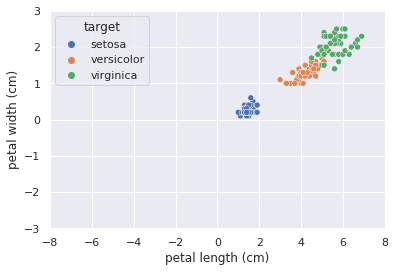

In [291]:
import seaborn as sns; sns.set()

sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target')
import matplotlib.pyplot as plt

plt.xlim(-8, 8)
plt.ylim(-3, 3);

In [292]:
from sklearn.cluster import KMeans
X = iris.data[:, [2, 3]] 
cX = X.tolist()
st = time.perf_counter()
Kmeans = KMeans(n_clusters=3)
et = time.perf_counter()
score = et - st;
print("Sklearn : ",score)

Kmeans.fit(X)
Kmeans.labels_
df["target"] = Kmeans.labels_
df.head()

#自作ライブラリ
print(X.shape)
st = time.perf_counter()
pred_iris = MyModule.KMeans(2,3,len(X),cX,0.001,8)
et = time.perf_counter()
score = et - st;
print("C++ Module : ",score)
df2["target"] = pred_iris


Sklearn :  5.378800051403232e-05
(150, 2)
C++ Module :  0.05822090799938451


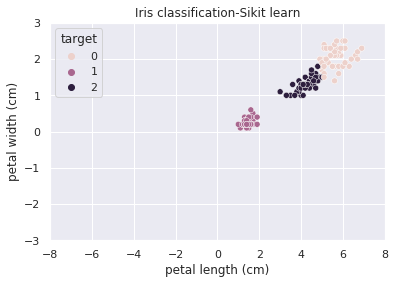

In [293]:

sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target')


plt.title("Iris classification-Sikit learn")
plt.xlim(-8, 8)
plt.ylim(-3, 3);

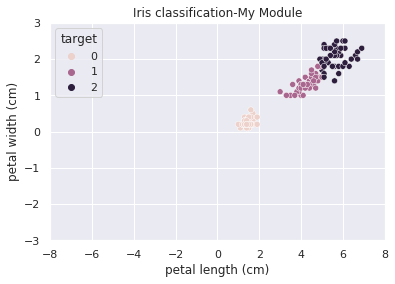

In [294]:
sns.scatterplot(data=df2, x='petal length (cm)', y='petal width (cm)', hue='target')


plt.title("Iris classification-My Module")
plt.xlim(-8, 8)
plt.ylim(-3, 3);